# Exploring "Fordgobike" data
## by Mostafa Mohamed Mohamed Imam

## Preliminary Wrangling
  > the dataset provides info about trips made by ford go bike's users such as duration, birth year, start and stop stations with ids and coordinates for each station for each trip as well as the start time of each trip from year to minutes and seconds

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df.dropna(inplace=True)

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [6]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

### What is the structure of your dataset?

the dataset had 183412 rows before cleaning and 174952 rows after cleaning and 16 columns
  - the dataset offers the following info about bike trips:
      -  duration_sec : duration of the trip in seconds
      -  start_time : starting time of the trip in from year to second
      -  end_time : ending time of the trip in from year to second
      -  start_station_id : id of the start station
      -  start_station_name : name of the start station
      -  start_station_latitude  : latitude coordinates of the start station
      -  start_station_longitude : longitude coordinates of the start station
      -  end_station_id : id of the end station
      -  end_station_name : name of the end station
      -  end_station_latitude : latitude coordinates of the end station
      -  end_station_longitude	: longitude coordinates of the end station
      -  bike_id : id of the bike in the recorded trip
      -  user_type : type of user (subscriber or customer)
      -  member_birth_year : birth year of the member who made the recorded trip
      -  member_gender : gander of the member
      -  bike_share_for_all_trip : yes or no status of it the trip was a "bike share for all trip"


### What is/are the main feature(s) of interest in your dataset?

> the main features of interest are age, duration, gender and date to explore the diffrences in trips between age groups and genders

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> -  the start_time column : to extract datetime info from it to calculate age and check for trends in weekdays and months
> -  the member_birthyear column : to calculate the age of the members when they made the trip
> -  the start_startion_name and end_station_name columns : to form a combination column to explore the most freqeunt routes
> -  the user_type column : to check for peformance diffrences between the two user types

In [7]:
# converting the 'start_time' column to datetime format to extract useful information of interst
df['start_time'] = pd.to_datetime(df['start_time'])

# exctracting months, days(monthly format), days(weekly format) and start hours
df.insert(1, 'current_year' , df['start_time'].dt.year)
df.insert(1, 'day_of_month' , df['start_time'].dt.day)
df.insert(1, 'day_of_week' , df['start_time'].dt.day_name())
df.insert(1, 'start_hour' , df['start_time'].dt.hour)
df.insert(1, 'duration_min' , round(df['duration_sec']/60, 2))
df.head()

,duration_sec,duration_min,start_hour,day_of_week,day_of_month,current_year,start_time,end_time,start_station_id,start_station_name,...,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,869.75,17,Thursday,28,2019,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),...,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,1030.90,12,Thursday,28,2019,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,...,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,608.17,17,Thursday,28,2019,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,...,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,26.42,23,Thursday,28,2019,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,...,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,29.88,23,Thursday,28,2019,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,...,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [8]:
# convert the member_birth_year column to int 
df['member_birth_year'] = df['member_birth_year'].astype(int)

**now we will create a column for start and stop stations combinations to use the most common route as a standard for comparing trip stats and start times across different age groups for that route**

In [9]:
# create a column for start and stop station combinations 
df['start_and_stop'] = df['start_station_name'] + ' to ' + df['end_station_name']
df.head(10)

,duration_sec,duration_min,start_hour,day_of_week,day_of_month,current_year,start_time,end_time,start_station_id,start_station_name,...,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_and_stop
0,52185,869.75,17,Thursday,28,2019,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),...,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Montgomery St BART Station (Market St at 2nd S...
2,61854,1030.90,12,Thursday,28,2019,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,...,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Market St at Dolores St to Powell St BART Stat...
3,36490,608.17,17,Thursday,28,2019,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,...,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Grove St at Masonic Ave to Central Ave at Fell St
4,1585,26.42,23,Thursday,28,2019,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,...,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Frank H Ogawa Plaza to 10th Ave at E 15th St
5,1793,29.88,23,Thursday,28,2019,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,...,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,4th St at Mission Bay Blvd S to Broadway at Ke...
6,1147,19.12,23,Thursday,28,2019,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,...,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Palm St at Willow St to San Jose Diridon Station
7,1615,26.92,23,Thursday,28,2019,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,...,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,Washington St at Kearny St to Valencia St at 2...
8,1570,26.17,23,Thursday,28,2019,2019-02-28 23:41:48.790,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,...,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,Washington St at Kearny St to Valencia St at 2...
9,1049,17.48,23,Thursday,28,2019,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,...,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,Post St at Kearny St to Mission Playground
10,458,7.63,23,Thursday,28,2019,2019-02-28 23:57:57.211,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,...,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,Jones St at Post St to San Francisco Public Li...


In [10]:
# create a column for the calculated age of each member
df['age'] = df['current_year'] - df['member_birth_year']
df.head()

,duration_sec,duration_min,start_hour,day_of_week,day_of_month,current_year,start_time,end_time,start_station_id,start_station_name,...,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_and_stop,age
0,52185,869.75,17,Thursday,28,2019,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),...,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Montgomery St BART Station (Market St at 2nd S...,35
2,61854,1030.90,12,Thursday,28,2019,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,...,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Market St at Dolores St to Powell St BART Stat...,47
3,36490,608.17,17,Thursday,28,2019,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,...,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Grove St at Masonic Ave to Central Ave at Fell St,30
4,1585,26.42,23,Thursday,28,2019,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,...,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Frank H Ogawa Plaza to 10th Ave at E 15th St,45
5,1793,29.88,23,Thursday,28,2019,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,...,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,4th St at Mission Bay Blvd S to Broadway at Ke...,60


**now we will check the age value counts to remove any insignificant numberd from the comparison and also check for any incorrect outliers**

In [11]:
# get the maximim and minimum ages
df.age.max(), df.age.min()

(141, 18)

**it appears we have very incorrect outliers on the side of older ages and now we will assess more and remove the incorrect and insignificant -for the purposes of this analysis-  ages because of their value counts**

In [12]:
# check value counts of ages over 70
df.query('age > 70').age.value_counts()


72     135
74     105
88      89
119     53
71      51
76      30
77      21
86      20
73      19
80      11
117     11
78       9
118      6
81       3
99       3
85       2
75       2
89       1
91       1
92       1
109      1
141      1
Name: age, dtype: int64

In [13]:
# check value counts of ages under 20
df.query('age < 20').age.value_counts()

19    1675
18      34
Name: age, dtype: int64

In [14]:
# drop rows with ages over 74
df.drop(df.query('age > 74').index, axis=0, inplace=True)
df['age'].value_counts()

31    10214
26     9323
30     8967
29     8640
28     8484
27     8245
32     8010
33     7953
25     7654
24     7420
34     7023
35     6557
36     5953
39     5011
37     4987
23     4637
38     4344
40     3756
22     3476
21     3208
41     2830
42     2706
45     2633
20     2504
44     2503
43     2435
46     2080
51     1927
48     1924
47     1909
19     1675
49     1590
54     1546
50     1414
52     1315
55     1189
56     1151
53      989
57      955
58      821
62      807
59      806
60      624
61      517
63      392
65      301
67      189
68      180
69      178
66      158
72      135
64      134
74      105
70       99
71       51
18       34
73       19
Name: age, dtype: int64

In [15]:
def age_grouping(age_groups_arr):
    
    '''
    takes in an array of ages (age_groups_arr) to be used as point stops for creating age group columns
    parameters : age_groups_array (arr)
    returns : ages (arr), edited dataframe
    '''
    
    global ages
    n = len(age_groups_arr)-1
    ages = age_groups_arr
    df['age_group'] = df['age'] * 0
    
    for i in range (n):  
        df['age{}to{}'.format(ages[i], ages[i+1])] = df['age'] * 0
        df['age{}to{}'.format(ages[i], ages[i+1])].mask((df['age'] >= ages[i]) & (df['age'] < ages[i+1]), 1, inplace=True)
        df['age_group'].mask((df['age'] >= ages[i]) & (df['age'] < ages[i+1]), 'age{}to{}'.format(ages[i], ages[i+1]), inplace=True)
    return ages

In [16]:
age_grouping([10, 20, 30, 40, 50, 60, 70, 80])

[10, 20, 30, 40, 50, 60, 70, 80]

In [17]:
# check the results
df.head()

,duration_sec,duration_min,start_hour,day_of_week,day_of_month,current_year,start_time,end_time,start_station_id,start_station_name,...,start_and_stop,age,age_group,age10to20,age20to30,age30to40,age40to50,age50to60,age60to70,age70to80
0,52185,869.75,17,Thursday,28,2019,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),...,Montgomery St BART Station (Market St at 2nd S...,35,age30to40,0,0,1,0,0,0,0
2,61854,1030.90,12,Thursday,28,2019,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,...,Market St at Dolores St to Powell St BART Stat...,47,age40to50,0,0,0,1,0,0,0
3,36490,608.17,17,Thursday,28,2019,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,...,Grove St at Masonic Ave to Central Ave at Fell St,30,age30to40,0,0,1,0,0,0,0
4,1585,26.42,23,Thursday,28,2019,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,...,Frank H Ogawa Plaza to 10th Ave at E 15th St,45,age40to50,0,0,0,1,0,0,0
5,1793,29.88,23,Thursday,28,2019,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,...,4th St at Mission Bay Blvd S to Broadway at Ke...,60,age60to70,0,0,0,0,0,1,0


## Univariate Exploration

**now we will look into some basic questions like:**
  - what are the proportions of user gender types?
  - what are the proportions of subscribed users and customer users?
  - what days are most of the trips made during the week?
  

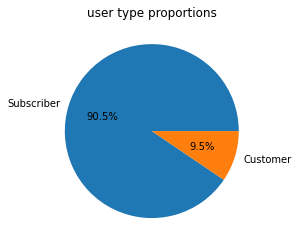

In [18]:
plt.pie(df['user_type'].value_counts(), labels =df['user_type'].value_counts().index, autopct='%1.1f%%');
plt.title('user type proportions');

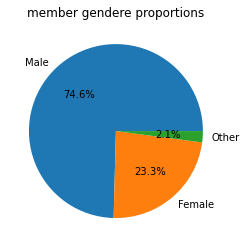

In [19]:
plt.pie(df['member_gender'].value_counts(), labels =df['member_gender'].value_counts().index, autopct='%1.1f%%');
plt.title('member gendere proportions');

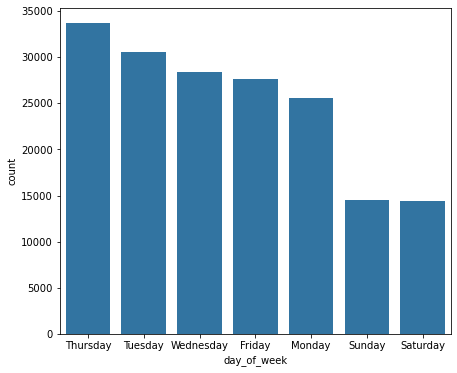

In [20]:
plt.figure(figsize=(7,6))
day_freq_order = df['day_of_week'].value_counts().index
sb.countplot(data = df, x = 'day_of_week', color = sb.color_palette()[0], order = day_freq_order);

**it seems that most of the trips made are in the middle of the week which may bring up a question to be further assesed, is it because the trips made in the middle of the week are usually commute and the ones made on saturday and sunday -weekend- are mostly for fun or personal matters other than work?**

one way we may asses this is by looking at the duration of the trips for each age group across the weekdays later in the multivariate exploration, if it is the case that trips are for fun  on weekends we should expect to see an increase in trip durations in weeksends later on

**now we will look if this is a trend in the entire month of just influnced by a certain week**

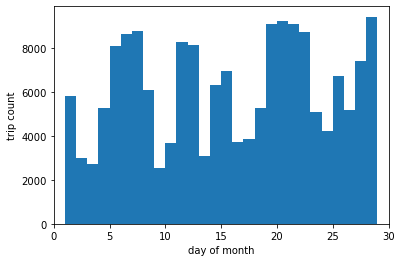

In [21]:
bins = np.arange(30)
plt.hist(data = df, x='day_of_month', bins = bins);
plt.xlim([0,30]);
plt.xlabel('day of month');
plt.ylabel('trip count');

**looking at the repeated peaks, it appears to be a valid trend in all weeks**

**now let's look at the distribution of trip durations**

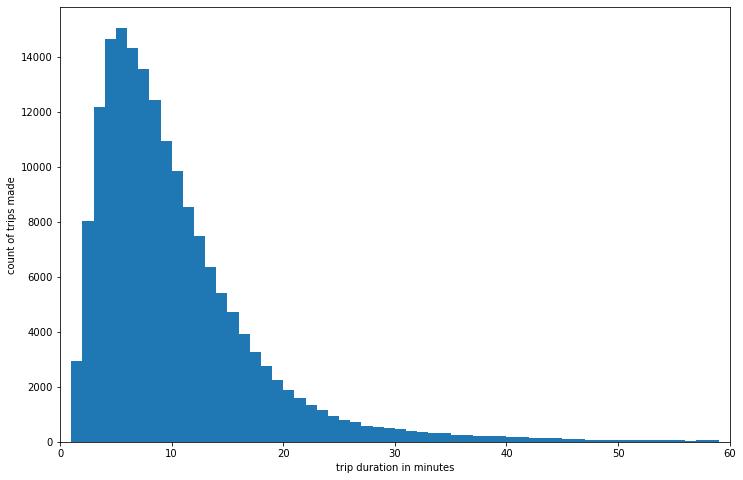

In [22]:
plt.figure(figsize = (12,8))
bins = np.arange(60)
plt.hist(data = df, x='duration_min', bins = bins);
plt.xlim([0, 60]);
plt.xlabel('trip duration in minutes');
plt.ylabel('count of trips made');

**trip counts seem to be rise then decrasing as the trips get longer with the peak around 7 mins**

**now lets explore the distribution of trips made across age**

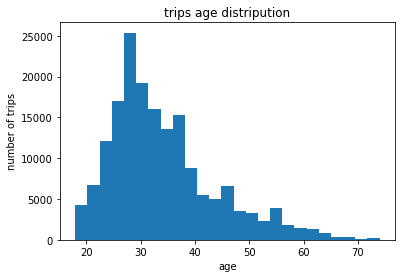

In [23]:
plt.hist(df.age, bins = 25);
plt.title("trips age distripution");
plt.xlabel("age");
plt.ylabel("number of trips");

C:\Users\test\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


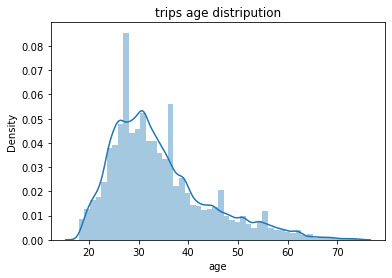

In [24]:
sb.distplot(df.age);
plt.title("trips age distripution");

**it seems that the number of trips made peaks around age 30**

**now lets start looking at the main question of interest which is what are the diffrences between different age groups in multiple variables**

**lets start by looking at the proportions of trips made by each age group**

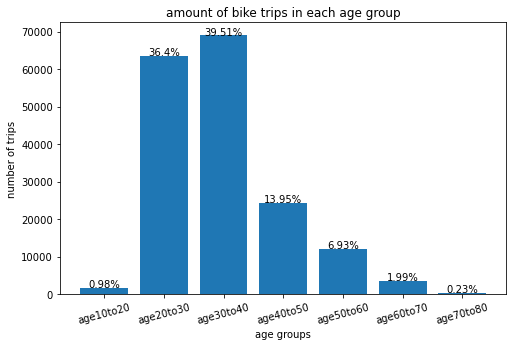

In [25]:
age_groups = df.columns.tolist()[24:]
age_amounts = []
age_props = []

for i in range (len(ages)-1):
    age_amounts.append(df['age{}to{}'.format(ages[i], ages[i+1])].sum())
    age_props.append(round(df['age{}to{}'.format(ages[i], ages[i+1])].sum() / df.shape[0], 4))

plt.figure(figsize = (8,5))
plt.bar(data = df, x=age_groups, height = age_amounts);
plt.xticks(rotation = 15);
plt.title("amount of bike trips in each age group")
plt.xlabel("age groups")
plt.ylabel("number of trips")

for i in range(len(age_groups)):
    plt.text(i, age_amounts[i]+150, '{}%'.format(round(age_props[i]*100, 2)), ha = 'center')


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> there was an unusual and according to validation in  the time of doing this analysis -11/2021- incorrect maximum age, ages went to 141 years in the dataframe and the oldest verified human alive as of this month is 122 years old 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the ditribution was logical across age groups with the amount of trips decreasing as the age group goes older starting from 20 years, but it was unexpected to see less  recorded trips under 20 years than trips made by people from 60 to 70

> I removed some of the unlikley ages and the unreliable counts for ages more than 70, and i choose 74 to be the maximum age of significant trip counts, and i removed it to have more reliable data if the occaion arises to look at metrics in the specific 70 to 80 group


## Bivariate Exploration

**now we will look art the amount of trips made by different genders across age groups and look at the proportions for the most significant groups**

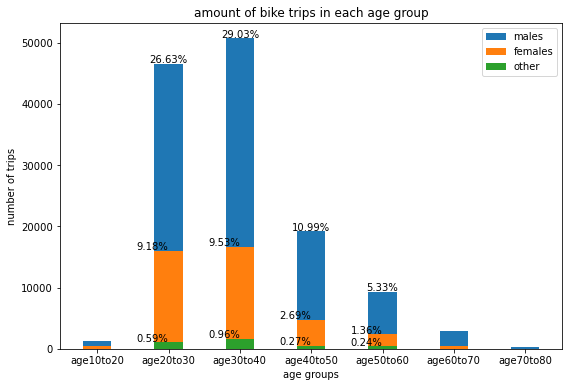

In [26]:
age_amounts_males = []
age_amounts_females = []
age_amounts_other = []
age_props_males = []
age_props_females = []
age_props_other = []
for i in range (len(ages)-1):
    age_amounts_males.append(df.query('member_gender == "Male"')['age{}to{}'.format(ages[i], ages[i+1])].sum())
    age_amounts_females.append(df.query('member_gender == "Female"')['age{}to{}'.format(ages[i], ages[i+1])].sum())
    age_amounts_other.append(df.query('member_gender == "Other"')['age{}to{}'.format(ages[i], ages[i+1])].sum())
    age_props_males.append(round(df.query('member_gender == "Male"')['age{}to{}'.format(ages[i], ages[i+1])].sum() / df.shape[0], 4))
    age_props_females.append(round(df.query('member_gender == "Female"')['age{}to{}'.format(ages[i], ages[i+1])].sum() / df.shape[0], 4))
    age_props_other.append(round(df.query('member_gender == "Other"')['age{}to{}'.format(ages[i], ages[i+1])].sum() / df.shape[0], 4))
plt.figure(figsize = (9,6))
X_axis = np.arange(len(age_groups))
plt.bar( data = df, x= age_groups , height = age_amounts_males, width = 0.4, label = 'males');
plt.bar( data = df, x= age_groups , height = age_amounts_females, width = 0.4, label = 'females');
plt.bar( data = df, x= age_groups , height = age_amounts_other, width = 0.4, label = 'other');
plt.xticks(rotation = 0);
plt.title("amount of bike trips in each age group")
plt.xlabel("age groups")
plt.ylabel("number of trips")
for i in range(1, len(age_groups)-2):
    plt.text(i, age_amounts_males[i]+200, '{}%'.format(round(age_props_males[i]*100, 2)), ha = 'center')
    plt.text(i, age_amounts_females[i]+200, '{}%'.format(round(age_props_females[i]*100, 2)), ha = 'right')
    plt.text(i, age_amounts_other[i]+200, '{}%'.format(round(age_props_other[i]*100, 2)), ha = 'right')
plt.legend()
plt.show()


**now we will look at trip duration across age groups**

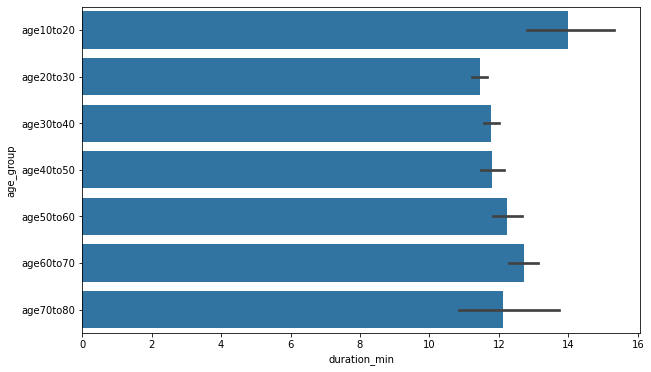

In [27]:
age_order = ['age10to20', 'age20to30', 'age30to40', 'age40to50', 'age50to60', 'age60to70', 'age70to80']
plt.figure(figsize = (10,6))
sb.barplot(x = 'duration_min', y='age_group' , data = df, color = sb.color_palette()[0], order = age_order);

**it appears that ages under 20 spend more time on their trips, that may have to do with the thoery of commute vs fun purposes  mentioned eariler**

it also appears the generally the trip duration increases slightly for each age group after the big decrease after the under 20 group, also it increases more signfifcantly again for ages more than 60 and that may again have to do with work commute vs other purposes thoery since that is the popular age of retirement

**now lets look at the trip durations for the most common station combination**

In [28]:
# get the most frequent station
df['start_and_stop'].value_counts()

Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               327
Grand Ave at Perkins St to 19th Street BART Station                                    307
San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    286
The Embarcadero at Sansome St to Steuart St at Market St                               282
19th Street BART Station to Grand Ave at Perkins St                                    281
                                                                                      ... 
San Francisco City Hall (Polk St at Grove St) to The Embarcadero at Vallejo St           1
Broadway at Kearny to Valencia St at 21st St                                             1
Virginia St at Shattuck Ave to 65th St at Hollis St                                      1
Backesto Park (Jackson St at 13th St) to San Pedro Square                                1
Webster St at O'Farrell St to Division St at Potrero Ave                                 1

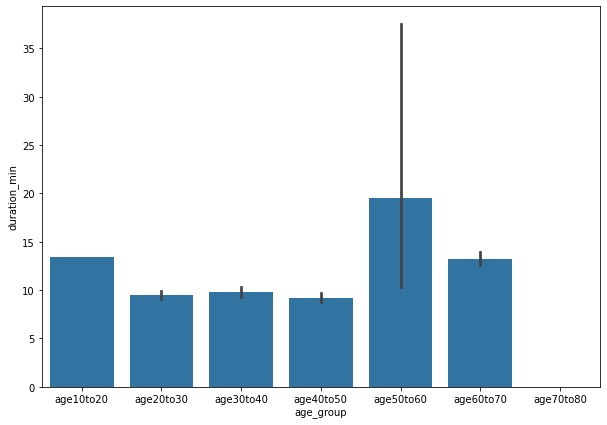

In [29]:
# filter by the most frequent station
df_freq_station = df.query('start_and_stop == "Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)"')
plt.figure(figsize = (10,7))
sb.barplot(x = 'age_group', y = 'duration_min', data = df_freq_station, color = sb.color_palette()[0], order = age_order );

**the findings support the earlier ones for ages under 20 and between 60 and 70 but suprisingly there is a significant increase of trip durations for this station for ages between 50 and 60**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> there seems to be a relationship between possible ages of workless time (10 to 20, 50 to 60) and trip duration and that may be due to the nature of the trip of ages over 20 and under 60 which may be more related to work commute or stressed by the lack of free time to waste on the way because of work and other responsibilities

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> for this analysis there seems to be no interesting relations observed away from the main features of interest

## Multivariate Exploration

**lets look at the relationship between age and trip duration across user types and genders**

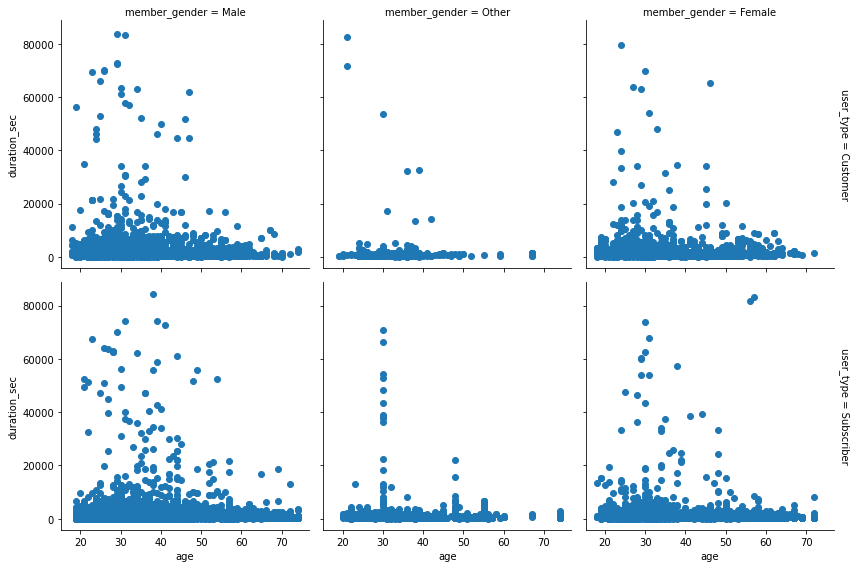

In [30]:
g = sb.FacetGrid(data = df, col = 'member_gender', row = 'user_type', height = 4, margin_titles = True)
g.map(plt.scatter, 'age', 'duration_sec');

**it appears that subscriber users generally make more longer trips than customer users across genders, and generally for across genders and user types longer duration trips frequency starts to decrease after 50** 

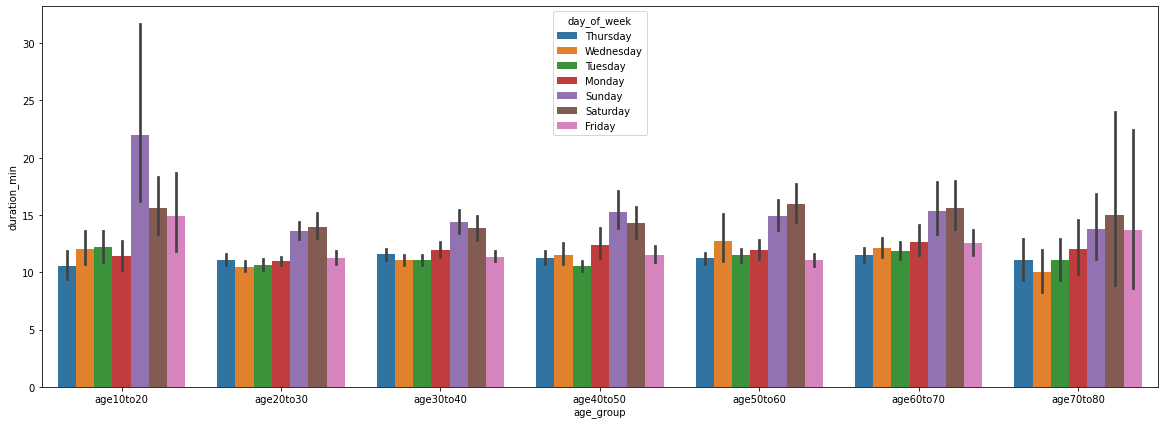

In [31]:
plt.figure(figsize = (20,7))
sb.barplot(x = 'age_group', y = 'duration_min', hue = 'day_of_week', data = df, order = age_order);

**the trip duration on week end days significantly increases for ages under 20 and is generally longer in weekend days which enforces the theory of the effect of free time and the nature of the trip on the duration, commute trips are more frequent while potentially other purposed trips are longer in duration**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> there seems to be an in increase trip duration for ages that mostly have more free time especially across weekends and especially for ages under 20

### Were there any interesting or surprising interactions between features?

> there is an interesting variability or range of trip durations for ages under 20 and over 60 as indicated by the lines in  the bar plots which may have to do with the presence of choice for these ages unlike the more focused and bounded by commute purposes or bounded by busy time ages which are between 20 and 30

### the final report for the main question and features of interest which form the question about significant diffrences in trip stats is that there seems to be a clear presence of the effect of the logical amounts of free time each group has and the variability in the trip durations as well as a very clear difference towards longer trip duration for ages under 20 especially in weekends.